## Этап 1: Загрузка и подготовка данных.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('/datasets/autos.csv').copy()

In [3]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
data.duplicated().sum()

4

In [6]:
data = data.drop_duplicates().reset_index(drop = True)

In [7]:
data.duplicated().sum()

0

In [8]:
data['DateCrawled'] = pd.to_datetime(data['DateCrawled'],format='%Y.%m.%d %H:%M:%S')
data['DateCreated'] = pd.to_datetime(data['DateCreated'],format='%Y.%m.%d %H:%M:%S')
data['LastSeen'] = pd.to_datetime(data['LastSeen'],format='%Y.%m.%d %H:%M:%S')


### Выводы по данным  
Данные загружены, просмотрены, удалены дубликаты.  
В признаках много пропусков. Также нужно оценить наличие выбросов.  

## Этап 2: Работа с выбросами данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08d53a8ed0>]],
      dtype=object)

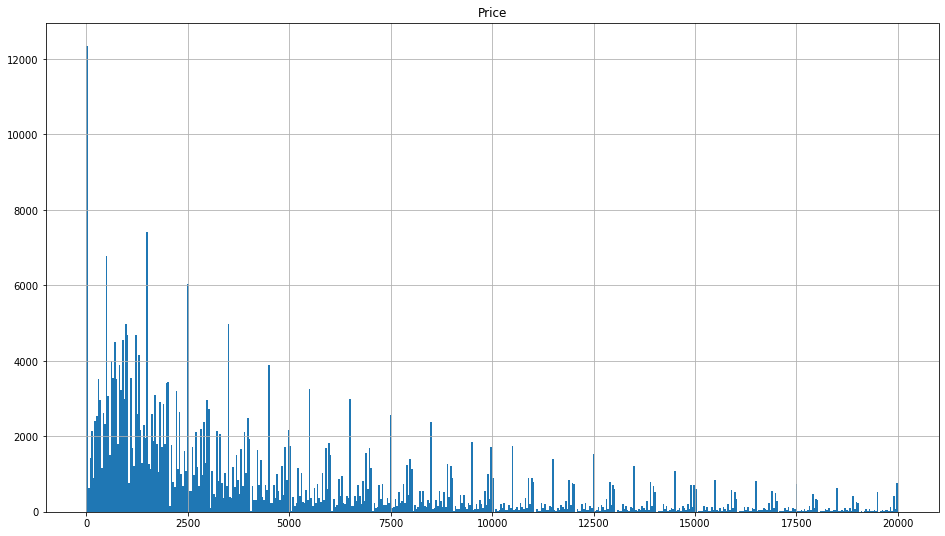

In [9]:
data.hist(column = 'Price', bins = 500, figsize = (16,9))

Гистограмма цены показала выброс значений, равных 0. Удалим строки с аномально низкой ценой

In [10]:
data = data[data['Price'] != 0]

In [11]:
np.sort(data['RegistrationYear'].unique())

array([1000, 1001, 1039, 1111, 1234, 1255, 1300, 1400, 1500, 1600, 1602,
       1800, 1910, 1923, 1925, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2066, 2200, 2222,
       2290, 2500, 2800, 2900, 3000, 3200, 3700, 3800, 4000, 4100, 4500,
       4800, 5000, 5300, 5555, 5600, 5900, 5911, 6000, 6500, 7000, 7100,
       7800, 8000, 8200, 8500, 8888, 9000, 9450, 9999])

In [12]:
data = data[(data['RegistrationYear'] >= 1910) & (data['RegistrationYear'] <= 2019)]


Оставили в выборке автомобили старше 1910 года  и младше 2019. Младше быть не может, поскольку  следующая по убыванию дата - это 1800 год. Точно мимо.


Text(0.5, 1.0, 'Распределение по мощностям  в диапазоне до 1250 л.с')

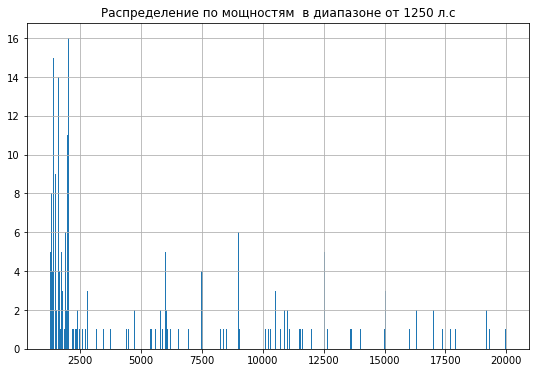

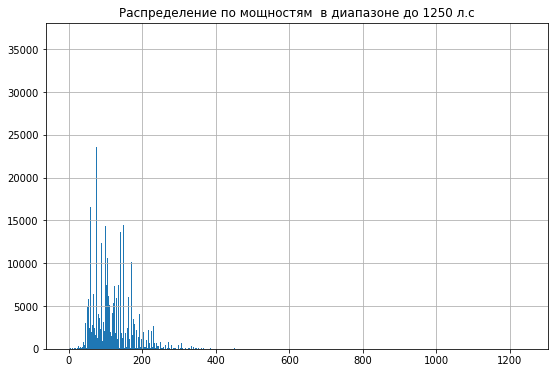

In [13]:
np.sort(data['Power'].unique())
data[data['Power'] >= 1250].hist(column = 'Power', bins = 500, figsize = (9,6))
plt.title('Распределение по мощностям  в диапазоне от 1250 л.с')
data[data['Power'] < 1250].hist(column = 'Power', bins = 500, figsize = (9,6))
plt.title('Распределение по мощностям  в диапазоне до 1250 л.с')

Руководствуясь логикой, нужно было удалить строки с аномальным значением. Пришлось почитать топ-10 самых мощных автомобилей.  
Оказалось, что выше 5000 л.с мощностей не бывает, но и такой высокий уровень - скорее исключение. Поэтому ограничиваюсь 2 тыс. и отсекаю нулевые значения.   

https://yandex.ru/turbo?text=https%3A%2F%2Fcars-rating.ru%2Flegkovye%2Fsamye-moshhnye-avtomobili-v-mire

In [14]:
data = data[(data['Power'] < 2000) & (data['Power'] != 0)]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307080 entries, 1 to 354364
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        307080 non-null  datetime64[ns]
 1   Price              307080 non-null  int64         
 2   VehicleType        285735 non-null  object        
 3   RegistrationYear   307080 non-null  int64         
 4   Gearbox            300998 non-null  object        
 5   Power              307080 non-null  int64         
 6   Model              294614 non-null  object        
 7   Kilometer          307080 non-null  int64         
 8   RegistrationMonth  307080 non-null  int64         
 9   FuelType           287297 non-null  object        
 10  Brand              307080 non-null  object        
 11  NotRepaired        259957 non-null  object        
 12  DateCreated        307080 non-null  datetime64[ns]
 13  NumberOfPictures   307080 non-null  int64   

In [16]:
np.sort(data['RegistrationMonth'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

В датасете 13 месяцев регистрации с нормальным распределением по количеству.  
Встаёт вопрос: нужен ли нам этот признак? Думаю, что нет.  

In [15]:
data['RegistrationMonth'].value_counts(normalize=True)

3     0.102159
6     0.092816
4     0.086714
5     0.086043
7     0.080106
10    0.076964
12    0.071428
11    0.070767
9     0.070252
1     0.067777
8     0.066308
0     0.065397
2     0.063270
Name: RegistrationMonth, dtype: float64

In [16]:
data = data.drop('RegistrationMonth', axis=1)

In [17]:
data['Kilometer'].describe()

count    307080.000000
mean     128419.923147
std       36743.681376
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: Kilometer, dtype: float64

In [18]:
data['VehicleType'].value_counts(normalize=True)

sedan          0.291007
small          0.245525
wagon          0.207605
bus            0.091812
convertible    0.065725
coupe          0.051191
suv            0.038385
other          0.008749
Name: VehicleType, dtype: float64

In [19]:
data = data.drop(['NumberOfPictures', 'PostalCode', 'DateCrawled', 'LastSeen', 'DateCreated'], axis = 1)

#### Заполнение  NaN

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307080 entries, 1 to 354364
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             307080 non-null  int64 
 1   VehicleType       285735 non-null  object
 2   RegistrationYear  307080 non-null  int64 
 3   Gearbox           300998 non-null  object
 4   Power             307080 non-null  int64 
 5   Model             294614 non-null  object
 6   Kilometer         307080 non-null  int64 
 7   FuelType          287297 non-null  object
 8   Brand             307080 non-null  object
 9   NotRepaired       259957 non-null  object
dtypes: int64(4), object(6)
memory usage: 25.8+ MB


In [21]:
data['NotRepaired'].fillna('unknown', inplace = True)

In [22]:
data['Model'].fillna('unknown', inplace = True)

In [23]:
full_data = data[
            ~(data['Model'].isnull()) & 
            ~(data['Gearbox'].isnull()) & ~(data['Power'].isnull()) & ~(data['FuelType'].isnull()) &
            ~(data['VehicleType'].isnull())]

In [24]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271350 entries, 1 to 354364
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             271350 non-null  int64 
 1   VehicleType       271350 non-null  object
 2   RegistrationYear  271350 non-null  int64 
 3   Gearbox           271350 non-null  object
 4   Power             271350 non-null  int64 
 5   Model             271350 non-null  object
 6   Kilometer         271350 non-null  int64 
 7   FuelType          271350 non-null  object
 8   Brand             271350 non-null  object
 9   NotRepaired       271350 non-null  object
dtypes: int64(4), object(6)
memory usage: 22.8+ MB


### Выводы по предобработке данных:  
1) Удалены аномальные года, цены, мощности автомобиля.  
2) Пропуски в признаках NotRepaired, Model заполнены категорией unknown  
В результате получили нормальный датасет, без придумок, на основе которого можно обучить модели.  

## Этап 3: Обучение моделей


#### Подготовка выборок

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import timeit

In [26]:
data_ohe = pd.get_dummies(full_data[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']], drop_first = True)
full_data = full_data.join(data_ohe).copy()

In [27]:
full_data = full_data.drop(['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'], axis = 1)

In [28]:
target = full_data['Price']
features = full_data.drop(['Price'], axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [29]:
numeric = ['RegistrationYear', 'Power', 'Kilometer']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])                           
features_valid[numeric] = scaler.transform(features_valid[numeric])

### Модель Catboost

In [30]:
from catboost import CatBoostRegressor

In [31]:
start_time = timeit.default_timer()
model = CatBoostRegressor(iterations=61,   #100
                          loss_function = 'RMSE',
                          learning_rate=1,
                          depth=10)         #14
model.fit(features_train, target_train)
cat_educ_time = round(timeit.default_timer() - start_time, 2)

predictions = model.predict(features_valid)

cat_pred_time = round(timeit.default_timer() - start_time - cat_educ_time, 2)

result = mean_squared_error(target_valid, predictions)
cat_rmse = result**0.5

print('CatBoost RMSE:', cat_rmse)
print('CatBoost education time:', cat_educ_time)
print('CatBoost prediction time:', cat_pred_time)





0:	learn: 2373.2331005	total: 224ms	remaining: 13.4s
1:	learn: 2124.3837614	total: 506ms	remaining: 14.9s
2:	learn: 1977.2029803	total: 714ms	remaining: 13.8s
3:	learn: 1915.2287561	total: 1s	remaining: 14.3s
4:	learn: 1886.1811473	total: 1.21s	remaining: 13.5s
5:	learn: 1854.2795811	total: 1.5s	remaining: 13.8s
6:	learn: 1821.2043259	total: 1.71s	remaining: 13.2s
7:	learn: 1804.8055556	total: 1.92s	remaining: 12.7s
8:	learn: 1789.7047823	total: 2.2s	remaining: 12.7s
9:	learn: 1765.2943470	total: 2.41s	remaining: 12.3s
10:	learn: 1751.0649818	total: 2.7s	remaining: 12.3s
11:	learn: 1736.9690615	total: 2.91s	remaining: 11.9s
12:	learn: 1722.8518917	total: 3.2s	remaining: 11.8s
13:	learn: 1710.7387930	total: 3.4s	remaining: 11.4s
14:	learn: 1701.1410339	total: 3.7s	remaining: 11.3s
15:	learn: 1682.2931057	total: 3.9s	remaining: 11s
16:	learn: 1673.6439938	total: 4.19s	remaining: 10.9s
17:	learn: 1664.9262779	total: 4.4s	remaining: 10.5s
18:	learn: 1656.3395220	total: 4.61s	remaining: 10.

##### Попытаемся найти результат ниже 1600. Для этого будем подбирать параметры iterations и depth.

In [34]:
for i in range(1,100,10):
    for d in range(1,16,3):
        model = CatBoostRegressor(iterations=i,
                          learning_rate=1,
                          depth=d)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = mean_squared_error(target_valid, predictions)
        if result**0.5 < 1600:
            print('====Alarm!====')
            print('iteration =', i, 'depth=', d, 'RMSE =', result**0.5)
            print('====Finish Alarm!====')



0:	learn: 3586.2462050	total: 32.2ms	remaining: 0us
0:	learn: 2773.1310676	total: 34.7ms	remaining: 0us
0:	learn: 2529.8222183	total: 30.6ms	remaining: 0us
0:	learn: 2340.5977787	total: 55.9ms	remaining: 0us
0:	learn: 2228.5066557	total: 341ms	remaining: 0us
0:	learn: 3586.2462050	total: 18.7ms	remaining: 187ms
1:	learn: 3189.1856274	total: 41.4ms	remaining: 186ms
2:	learn: 3040.9376861	total: 57.2ms	remaining: 153ms
3:	learn: 2961.2807283	total: 73.1ms	remaining: 128ms
4:	learn: 2881.9840610	total: 85.4ms	remaining: 102ms
5:	learn: 2812.2488826	total: 107ms	remaining: 89.4ms
6:	learn: 2772.1500755	total: 122ms	remaining: 69.9ms
7:	learn: 2730.1505795	total: 137ms	remaining: 51.5ms
8:	learn: 2687.2744009	total: 155ms	remaining: 34.4ms
9:	learn: 2650.6500569	total: 181ms	remaining: 18.1ms
10:	learn: 2621.5097101	total: 203ms	remaining: 0us
0:	learn: 2773.1310676	total: 31.3ms	remaining: 313ms
1:	learn: 2559.6794732	total: 60.1ms	remaining: 271ms
2:	learn: 2426.4145218	total: 80.9ms	rema

Результат: Эксперимент не помог значительно улучшить показатель RMSE, однако при параметрах iteration = 61 depth= 10 (Исходные параметры были введены рандомно iteration = 100 depth= 14) получилост сократить время на обучение и предсказания.


### Линейная регрессия

In [35]:
from sklearn.linear_model import LinearRegression
start_time_lin = timeit.default_timer()

model_linear = LinearRegression()
model_linear.fit(features_train, target_train)
linear_educ_time = round(timeit.default_timer() - start_time_lin, 2)

linear_predictions = model_linear.predict(features_valid)
linear_pred_time = round(timeit.default_timer() - start_time_lin - linear_educ_time, 2)

linear_reg_result = mean_squared_error(target_valid, linear_predictions)
linear_rmse = linear_reg_result**0.5

print('LinearReg RMSE:', linear_rmse)
print('LinearReg education time:', linear_educ_time)
print('LinearReg prediction time:', linear_pred_time)




LinearReg RMSE: 2647.7062765951905
LinearReg education time: 6.26
LinearReg prediction time: 0.44


In [36]:
import lightgbm as lgb

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [46]:
lgb_start_time = timeit.default_timer()

lgb_model = lgb.LGBMRegressor(max_depth = 13, num_leaves = 80, learning_rate = 0.1)
lgb_model.fit(features_train, target_train)
lgb_edu_time = round(timeit.default_timer() - lgb_start_time, 2)

lgb_predictions = lgb_model.predict(features_valid)

lgb_pred_time = round(timeit.default_timer() - lgb_edu_time - lgb_start_time, 2)




In [38]:
lgb_result = mean_squared_error(target_valid, lgb_predictions)**0.5

print('LinearReg RMSE:', lgb_result)
print('LinearReg education time:', lgb_edu_time)
print('LinearReg prediction time:', lgb_pred_time)


LinearReg RMSE: 1559.2405317181874
LinearReg education time: 7.91
LinearReg prediction time: 1.84


In [45]:
for l in range(10,100,10):
    for d in range(1,16,3):
        lgb_start_time = timeit.default_timer()
        model = lgb.LGBMRegressor(max_depth = d, num_leaves = l, learning_rate = 0.1)
        model.fit(features_train, target_train)
        lgb_edu_time = round(timeit.default_timer() - lgb_start_time, 2)
        predictions = model.predict(features_valid)
        lgb_pred_time = round(timeit.default_timer() - lgb_edu_time - lgb_start_time, 2)
        result = mean_squared_error(target_valid, predictions)**0.5
        if result < 1600:
            print('====Alarm!====')
            print('max_depth =', d, 'num_leaves=', l, 'RMSE =',
                  result, 'Edu_time =', lgb_edu_time, 'Pred_time',  lgb_pred_time)


====Alarm!====
max_depth = 13 num_leaves= 70 RMSE = 1597.1869158039608 Edu_time = 4.77 Pred_time 0.94
====Alarm!====
max_depth = 13 num_leaves= 80 RMSE = 1591.5018746504652 Edu_time = 2.81 Pred_time 0.77
====Alarm!====
max_depth = 10 num_leaves= 90 RMSE = 1599.4812197477816 Edu_time = 3.02 Pred_time 0.63
====Alarm!====
max_depth = 13 num_leaves= 90 RMSE = 1583.1656139906274 Edu_time = 2.98 Pred_time 0.68


В ходе подбора гиперпараметров усовершенствовать показатели не удалось, однако удалось подобрать гипермараметры, сокращающие время обучения и предсказания.
Исходные параметры: max_depth = 50, num_leaves = 100.  
Были заменены на max_depth = 13 num_leaves= 80 RMSE = 1591.5018746504652, посколькольку выдавали лучший резульат по времени. 


In [40]:
from sklearn.ensemble import RandomForestRegressor
forest_start_time = timeit.default_timer()

regr = RandomForestRegressor(max_depth=100, max_leaf_nodes = 4, random_state=12345)
regr.fit(features_train, target_train)
forest_edu_time = round(timeit.default_timer() - forest_start_time, 2)

forest_predictions = regr.predict(features_valid)
forest_pred_time = round(timeit.default_timer() - forest_edu_time - forest_start_time, 2)



In [41]:
forest_result = mean_squared_error(target_valid, forest_predictions) **0.5

print('RandomForestRegressor RMSE:', forest_result)
print('RandomForestRegressor education time:', forest_edu_time)
print('RandomForestRegressor prediction time:', forest_pred_time)

RandomForestRegressor RMSE: 3133.2499480540846
RandomForestRegressor education time: 106.85
RandomForestRegressor prediction time: 0.33


In [42]:
final_table = pd.DataFrame({'Model': ['Catboost', 'LinearRegression', 'lightgbm', 'RandomForestRegressor'],
                          'Best RMSE':[cat_rmse, linear_rmse, lgb_result, forest_result],
                          'Education time': [cat_educ_time, linear_educ_time, lgb_edu_time, forest_edu_time],
                          'Prediction time': [cat_pred_time, linear_pred_time, lgb_pred_time, forest_pred_time]})


In [43]:
final_table

,Model,Best RMSE,Education time,Prediction time
0,Catboost,1597.534637,8.80,0.09
1,LinearRegression,2647.706277,6.26,0.44
2,lightgbm,1559.240532,7.91,1.84
3,RandomForestRegressor,3133.249948,106.85,0.33


## Выводы  
Модели Catboost и lightgbm  показали схожий реузльтат по RMSE.  
Тюнинг гиперпараметров не привёл к улучшению ключевой метрики, однако позволили снизить время на обучение и предсказания.  
Лидером исследорвания по скорости обучения стала lightgbmб тогда как Catboost оказалась быстрее в предсказаниях.  